In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
data = pd.read_csv('Dataset/Athens.csv')
print(data.shape)

# Controversial choice, but lets see
data = data.dropna()
print(data.shape)

data.head()

(66747, 84)
(26758, 84)


,last_update_date,N_qubits,N_cx,N_measures,cx_0_1,cx_0_2,cx_0_3,cx_0_4,cx_1_0,cx_1_2,...,T2_3,readout_error_3,T1_4,T2_4,readout_error_4,0,1,2,3,4
6,2020-05-03 10:03:21+02:00,5,1,5,0,0,0,0,0,0,...,24.146419,0.016667,53.144192,76.958280,0.023333,4.0,3.0,2.0,1.0,0.0
7,2020-12-07 23:06:24+01:00,5,14,5,0,2,2,0,0,0,...,25.182228,0.016700,72.930044,64.517835,0.053200,2.0,4.0,1.0,3.0,0.0
8,2020-10-12 08:09:48+02:00,5,6,5,0,0,0,0,0,0,...,28.745950,0.014700,49.958010,72.354731,0.015900,0.0,2.0,1.0,3.0,4.0
9,2020-09-10 13:25:58+02:00,5,17,5,2,0,0,2,0,0,...,44.439039,0.012200,60.279715,82.984785,0.045000,4.0,1.0,0.0,3.0,2.0
13,2020-08-10 07:36:22+02:00,5,13,5,0,0,0,0,0,0,...,45.842043,0.022900,39.173300,115.457597,0.018300,2.0,0.0,3.0,1.0,4.0


In [3]:
len(data.columns)

84

In [4]:
y = data[['0', '1', '2', '3', '4']]
print(y.shape)
y.head()

(26758, 5)


,0,1,2,3,4
6,4.0,3.0,2.0,1.0,0.0
7,2.0,4.0,1.0,3.0,0.0
8,0.0,2.0,1.0,3.0,4.0
9,4.0,1.0,0.0,3.0,2.0
13,2.0,0.0,3.0,1.0,4.0


In [5]:
X = data.drop(columns=['0', '1', '2', '3', '4', 'last_update_date'])
print(X.shape)
X.head()

(26758, 78)


,N_qubits,N_cx,N_measures,cx_0_1,cx_0_2,cx_0_3,cx_0_4,cx_1_0,cx_1_2,cx_1_3,...,readout_error_1,T1_2,T2_2,readout_error_2,T1_3,T2_3,readout_error_3,T1_4,T2_4,readout_error_4
6,5,1,5,0,0,0,0,0,0,0,...,0.0350,106.488868,119.982326,0.011667,80.320345,24.146419,0.016667,53.144192,76.958280,0.023333
7,5,14,5,0,2,2,0,0,0,0,...,0.0428,110.162150,157.132011,0.013700,94.374982,25.182228,0.016700,72.930044,64.517835,0.053200
8,5,6,5,0,0,0,0,0,0,2,...,0.0137,120.966078,94.106302,0.012300,157.856674,28.745950,0.014700,49.958010,72.354731,0.015900
9,5,17,5,2,0,0,2,0,0,0,...,0.0144,91.449658,153.575729,0.013900,60.967640,44.439039,0.012200,60.279715,82.984785,0.045000
13,5,13,5,0,0,0,0,0,0,0,...,0.0153,105.477772,178.278446,0.018400,102.119128,45.842043,0.022900,39.173300,115.457597,0.018300


### Trying it out with TensorFlow

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [21]:
import tensorflow as tf

# Define the input and output layer sizes
input_size = 78
output_size = 6

# Define the architecture of the hidden layers

# Define the input and output layers
input_layer = tf.keras.layers.Input(shape=(input_size,))
output_layers = []

# Define the hidden layers
hidden_layer_1 = tf.keras.layers.Dense(264, activation='relu')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(1024, activation='relu')(hidden_layer_1)
dropout_layer = tf.keras.layers.Dropout(rate=dropout_rate)(hidden_layer_2)
#hidden_layer_3 = tf.keras.layers.Dense(hidden_size_3, activation='relu')(dropout_layer)

# Define the slot architecture
for i in range(5):
    slot_hidden_layer_1 = tf.keras.layers.Dense(256, activation='relu')(dropout_layer)
    slot_hidden_layer_2 = tf.keras.layers.Dense(128, activation='relu')(slot_hidden_layer_1)
    slot_output_layer = tf.keras.layers.Dense(output_size, activation='softmax')(slot_hidden_layer_2)
    output_layers.append(slot_output_layer)

# Combine the slot outputs into one tensor
combined_output_layer = tf.keras.layers.concatenate(output_layers)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 78)]         0           []                               
                                                                                                  
 dense_144 (Dense)              (None, 264)          20856       ['input_10[0][0]']               
                                                                                                  
 dense_145 (Dense)              (None, 1024)         271360      ['dense_144[0][0]']              
                                                                                                  
 dropout_8 (Dropout)            (None, 1024)         0           ['dense_145[0][0]']              
                                                                                            

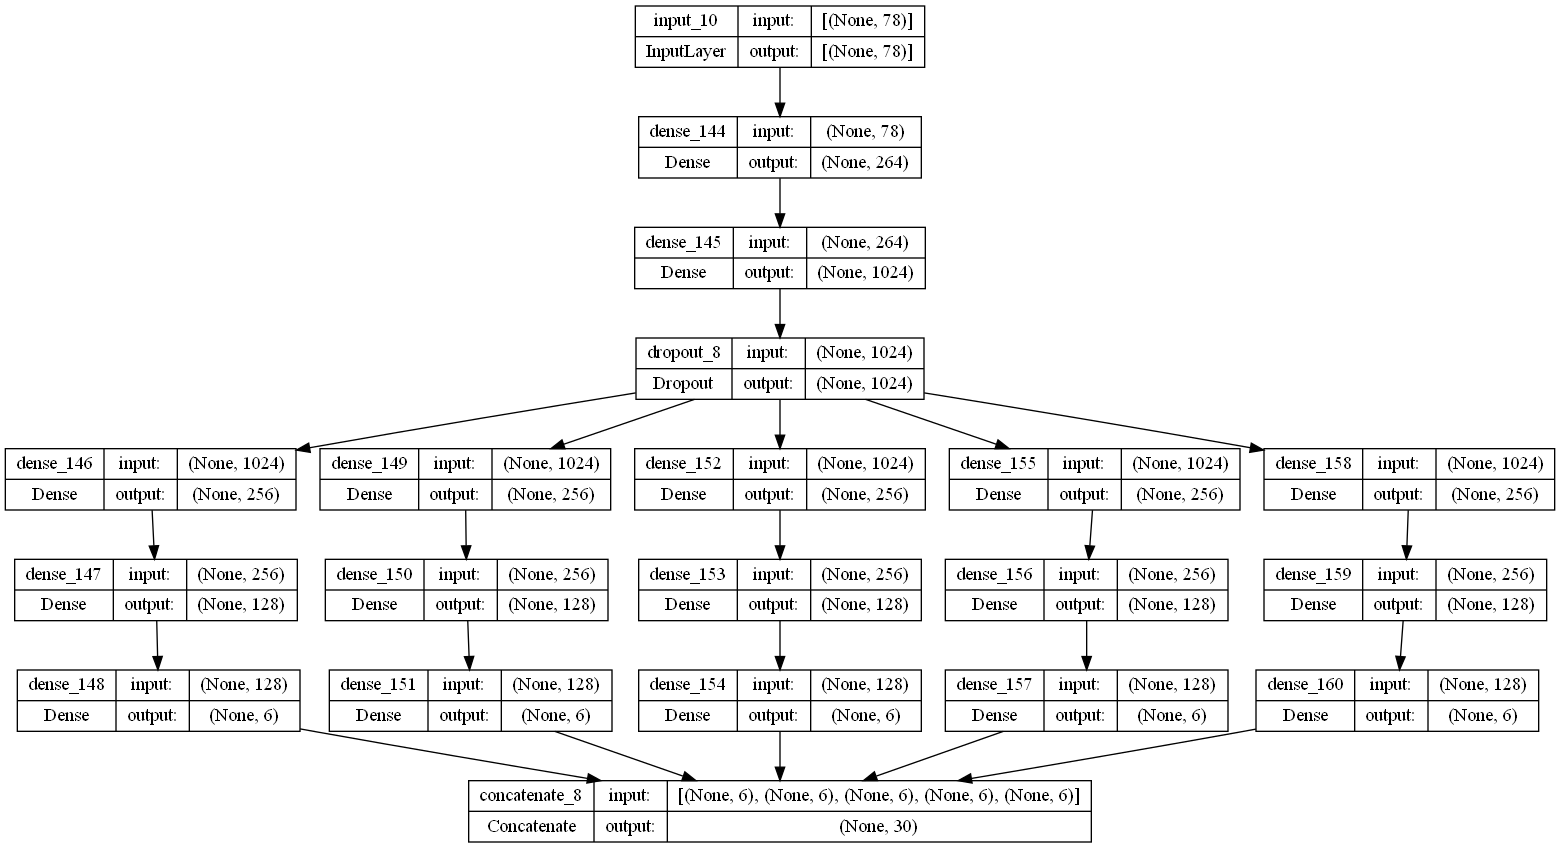

In [20]:
model = tf.keras.models.Model(inputs=input_layer, outputs=combined_output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, "layout.png",show_shapes="True")

### Yet to run training loop